In [2]:
import numpy as np
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
from read_HiC import name_chromosomes

import sys
path=r'C:\Users\scalvinib\Documents\Phd_project_reduced\work directory jupyter lab\topology\genome_topology\functions'
sys.path.append(path)

from plotting_tools import set_layout
from genome_topology import normalize_psc
from genome_topology import get_matrix
from genome_topology import fractal_dimension
from genome_topology import make_graph

## CIRCUIT TOPOLOGY ANALISIS OF CHROMOSOME FROM SINGLE CELL Hi-C CONTACT LISTS

This notebook processes single cell Hi-C contact lists (in txt format) to extract topological parameters such as:
- CT parameters (percentage of series, parallel and cross, number of contacts) 
- Network clustering coefficient
- Fractal dimension (calculated over the CT topology matrix)

Load contact pair data file. Each file contains contacts from one cell.

In [3]:
file='GSM2219498_Cell_2_contact_pairs'
contacts=pd.read_csv('data/Hi-C data/{}.txt'.format(file), sep= '\t' )
cell=file[-20:-14]
n_all_chr=20

chr_vec=name_chromosomes(n_all_chr)

Set path for printing results

In [4]:
save_data= True
save_matrix= True
plot_matrix=True
path_savematrix='results/matrices/{}'.format(cell)
path_savedata='results/CT parameters'

Calculate topological parameters looping over all chromosomes in a cell

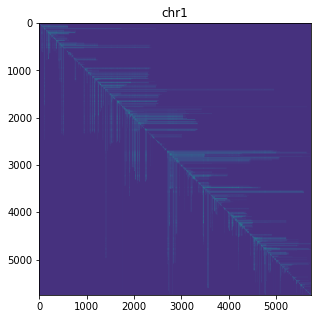

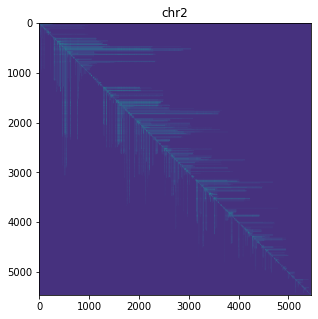

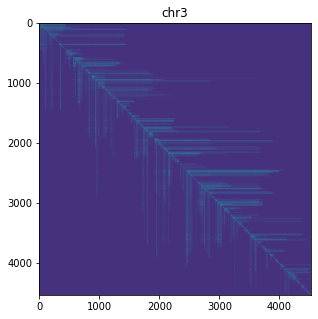

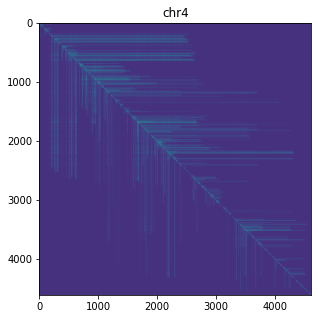

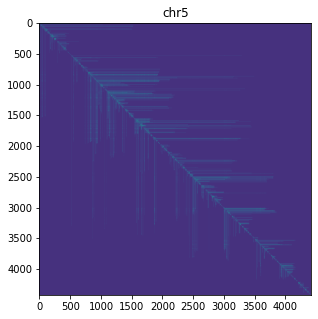

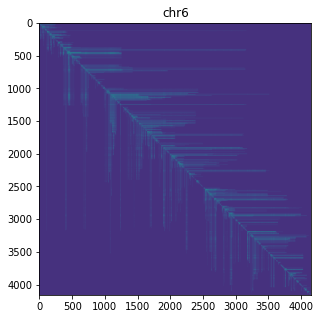

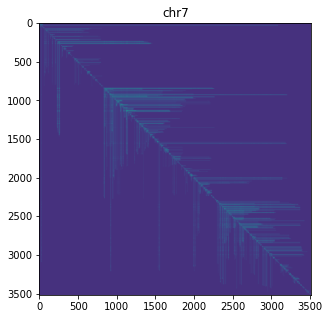

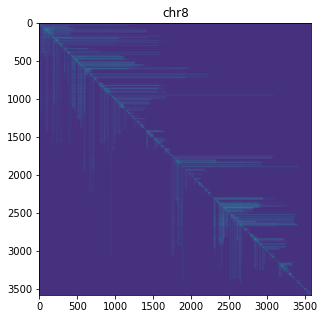

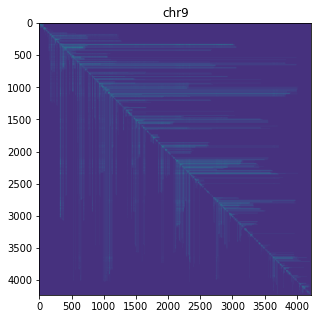

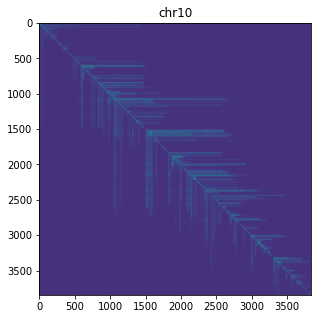

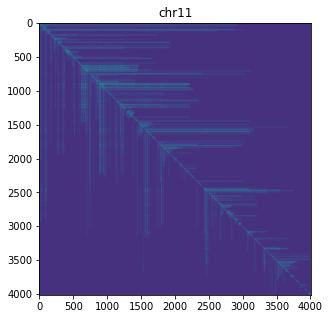

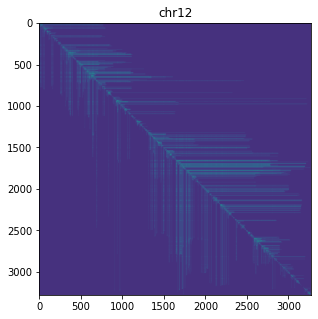

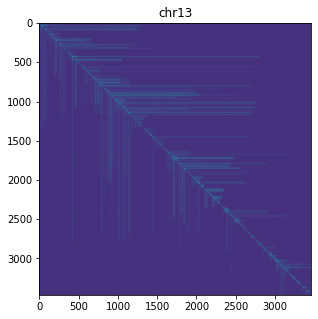

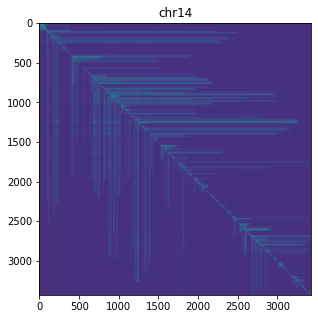

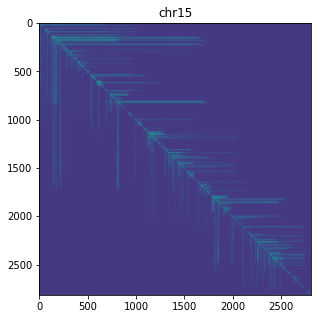

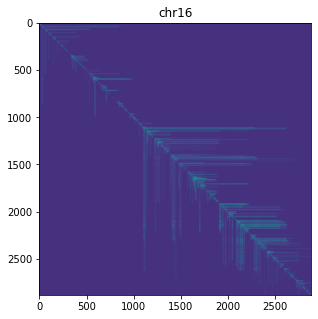

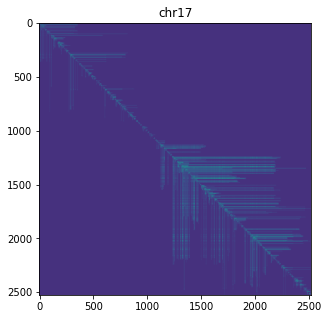

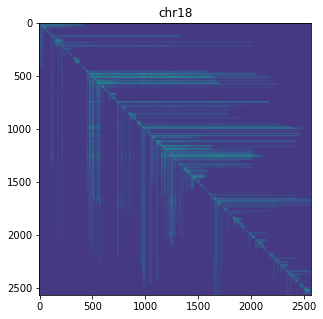

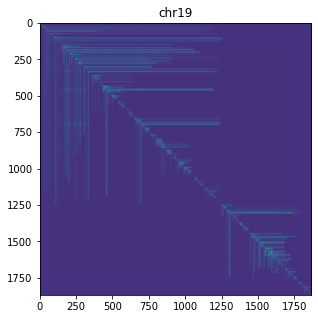

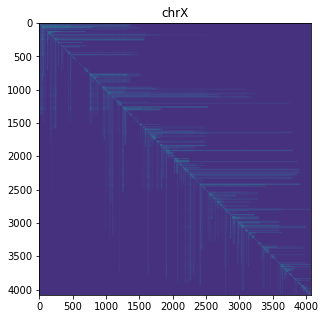

In [5]:
P=np.zeros(n_all_chr)
S=np.zeros(n_all_chr)
X=np.zeros(n_all_chr)
Dim_fractal = np.zeros(n_all_chr)
clustering = np.zeros(n_all_chr)
r2_fractalfit = np.zeros(n_all_chr)
N_contacts=np.zeros(n_all_chr)

for t, chrom in enumerate(chr_vec):

    contacts_chr= contacts[(contacts['#chr_A']== chrom) & (contacts['chr_B']== chrom) ]
    index= [contacts_chr['pos_A'], contacts_chr['pos_B']]
    index=np.array(index)
    index= np.transpose(index)
    N_contacts[t]= len(index)

    mat, psc = get_matrix(index, chrom)
    P[t], S[t], X[t]=normalize_psc(psc, N_contacts[t])
    Dim_fractal[t], r2_fractalfit[t]=fractal_dimension(mat, plot_fig=0)
    G=make_graph(index)
    clustering[t]= nx.average_clustering(G)
    
    if plot_matrix:
        plt.figure(figsize=(5, 5))
        plt.imshow(mat)
        plt.title('{}'.format(chrom))
    
    if save_matrix:
        PIL.Image.fromarray(mat.astype(float)).save(
            "{}/top_matrix_{}_{}.tif".format(path_savematrix,cell, chrom))

#Save results
if save_data:
    topology_parameters = {'Parallel (%)':P, 'Series (%)':S, 'Cross (%)':X,
                           'N contacts': N_contacts, 'Fractal dimension':Dim_fractal, 
                           'r squared': r2_fractalfit, 'Clustering': clustering}
    
    topology_parameters= pd.DataFrame(topology_parameters)
    
    topology_parameters.to_csv('{}/Top_parameters_{}.csv'.format(path_savedata, cell))